# Worksheet 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q1

In [2]:
def is_prime(x):
    if x==1:
        return False
    for i in range(2,int(np.sqrt(x))+1):
        if x%i==0:
            return False
    return True

In [3]:
is_prime(6)

False

## Q2

In [4]:
def primes(x,y):
    primes =[]
    for i in range(int(x),int(y)):
        if is_prime(i):
            primes.append(i)# appending to prime list
    return primes

In [5]:
primes(1,100)

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

## Q3

In [6]:
def factorial(n):
    prod = 1
    for i in range(1,n+1):
        prod*=i# factorial
    return prod
def nth_term(x,n):
    fact = factorial(n)
    term = pow(x,n)/fact #nth term of the taylor series
    return term

In [7]:
def f(x,n):
    expx=0
    for i in range(0,n+1):
        expx += nth_term(x,i)# sum till the nth term of the taylor series
    return expx

In [8]:
f(3,3)

13.0

Below figure not important, just for checking

In [9]:
N = 20
xval = np.linspace(-1,1)
yac = np.exp(xval)
ytay = f(xval,2)

Text(0, 0.5, 'y')

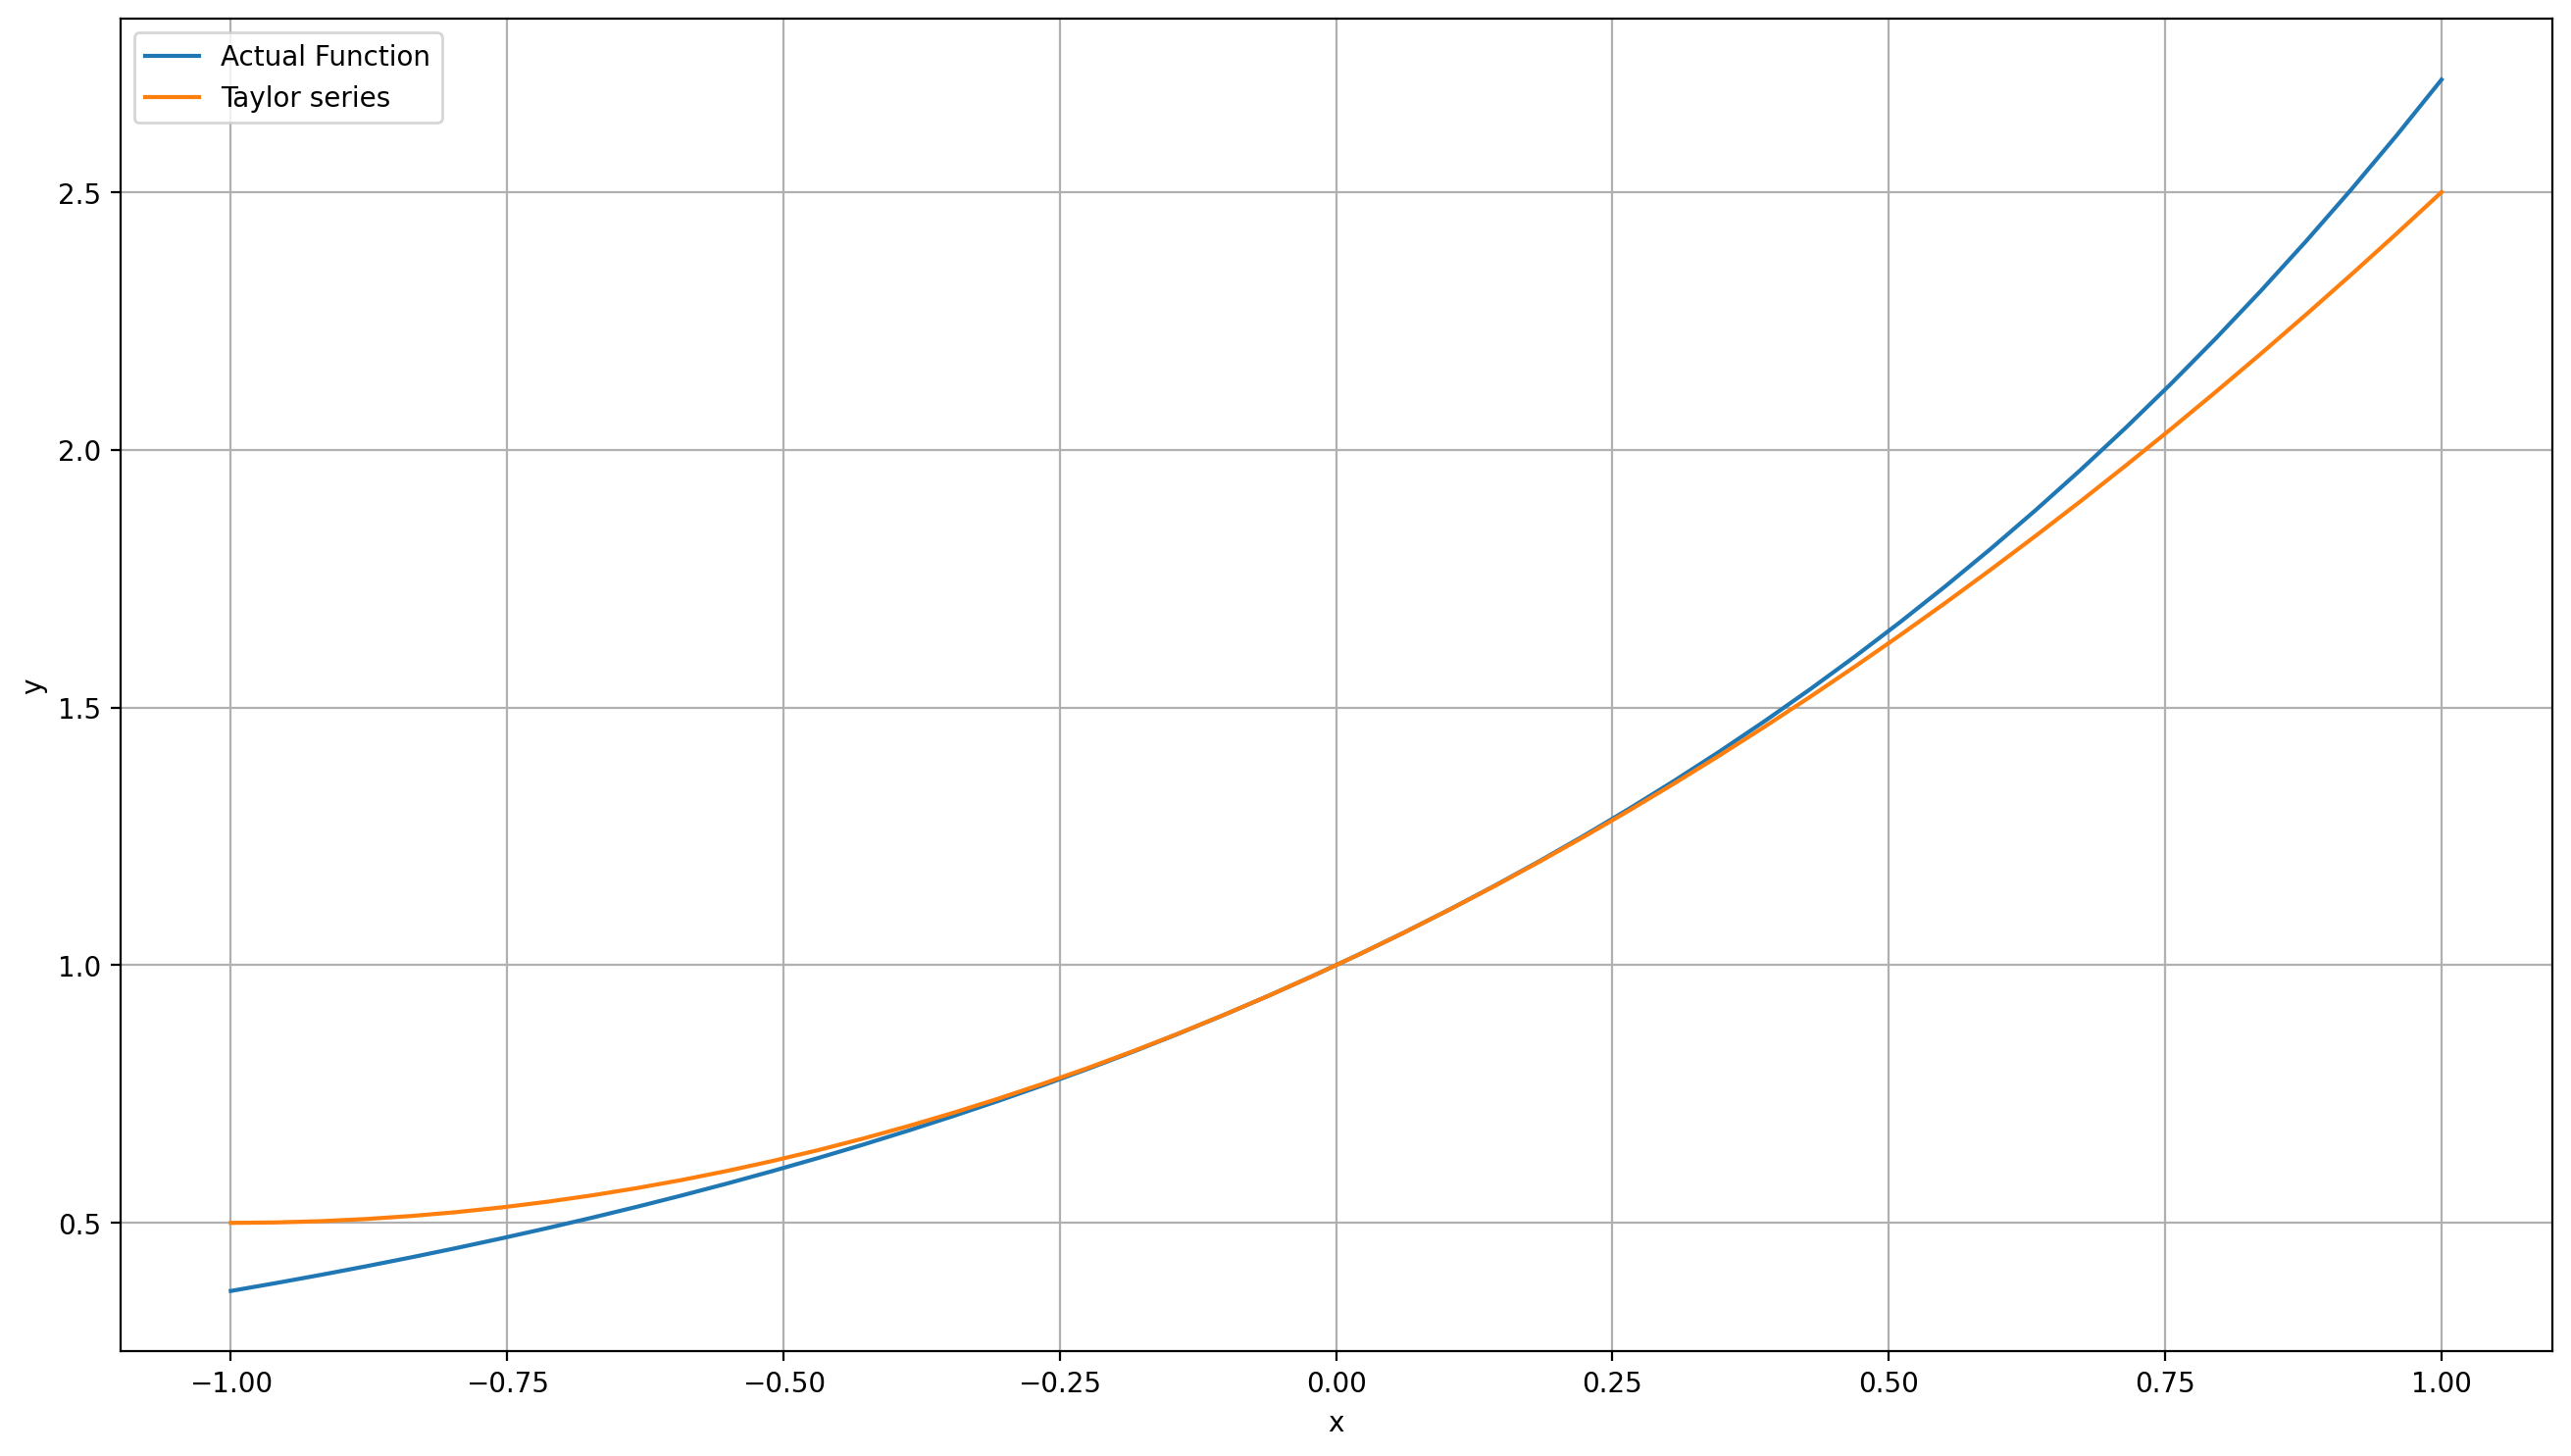

In [10]:
fig,axes = plt.subplots(1,1,figsize=(16,9),dpi=200)
axes.plot(xval,yac,label = "Actual Function")
axes.plot(xval,ytay, label="Taylor series")
axes.grid()
axes.legend()
axes.set_xlabel("x")
axes.set_ylabel("y")

## Q4

In [11]:
x = np.arange(0.1,1.1,0.1)
n = np.arange(4,21,4)

In [12]:
x,n

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([ 4,  8, 12, 16, 20]))

In [13]:
def print_table(x,n):
    r1 = "N  "
    for i in x:
        r1+=f"{i:10.1f}"# column labels
    r1+=f"\n"
    for i in range(0,len(n)):
        y = f(x,n[i])
        r1 = r1 + f"{n[i]:3d}"# row labels
        for j in range(0,len(x)):
            r1 = r1 +f"{y[j]:10.6f}"# printing out values at different x
        r1=r1+"\n"
    return r1

In [14]:
print(print_table(x,n))

N         0.1       0.2       0.3       0.4       0.5       0.6       0.7       0.8       0.9       1.0
  4  1.105171  1.221400  1.349838  1.491733  1.648438  1.821400  2.012171  2.222400  2.453837  2.708333
  8  1.105171  1.221403  1.349859  1.491825  1.648721  1.822119  2.013753  2.225541  2.459602  2.718279
 12  1.105171  1.221403  1.349859  1.491825  1.648721  1.822119  2.013753  2.225541  2.459603  2.718282
 16  1.105171  1.221403  1.349859  1.491825  1.648721  1.822119  2.013753  2.225541  2.459603  2.718282
 20  1.105171  1.221403  1.349859  1.491825  1.648721  1.822119  2.013753  2.225541  2.459603  2.718282



## Q5

In [15]:
# Brouncker's Countinued Fraction
def pi_cf(n):
    frac = 0
    if n==1:# special case for n=1
        return 4
    frac += pow((2*n-3),2)/2# calculating the last element
    for i in range(n-1,1,-1):
        t = pow((2*i-3),2)# calculating odd powers
        frac = t/(2+frac)# adding to continued fraction
    frac+=1#adding initial term to continued fraction
    return 4/frac  

# Leibnitz formula
def pi_leib(n):
    flag =-1# for switching signs
    lei = 1
    for i in range(1,n):
        lei = lei+flag/(2*i+1)#fformula
        flag*=-1
    lei=4*lei
    return lei

In [16]:
pi_cf(100)

3.1315929035585524

In [17]:
pi_leib(3)

3.466666666666667

In [18]:
def pi_print_table(n):
    PI ="n   Ctd.fraction Leibnitz  "# column labels
    r1 = PI+f"\n"
    for i in range(1,n+1):
        r1 = r1+f"{i:3d}{pi_cf(i):13.8f} {pi_leib(i):10.8f}\n"# printing out rows
    return r1

In [19]:
print(pi_print_table(10))

n   Ctd.fraction Leibnitz  
  1   4.00000000 4.00000000
  2   2.66666667 2.66666667
  3   3.46666667 3.46666667
  4   2.89523810 2.89523810
  5   3.33968254 3.33968254
  6   2.97604618 2.97604618
  7   3.28373848 3.28373848
  8   3.01707182 3.01707182
  9   3.25236593 3.25236593
 10   3.04183962 3.04183962



In [20]:
nval = np.arange(1,100,1)
piac = np.pi*np.ones(len(nval))# actual value as per numpy
picf = [pi_cf(i) for i in nval]# continued fraction representation
pile = [pi_leib(i) for i in nval]# leibnitz formula representation

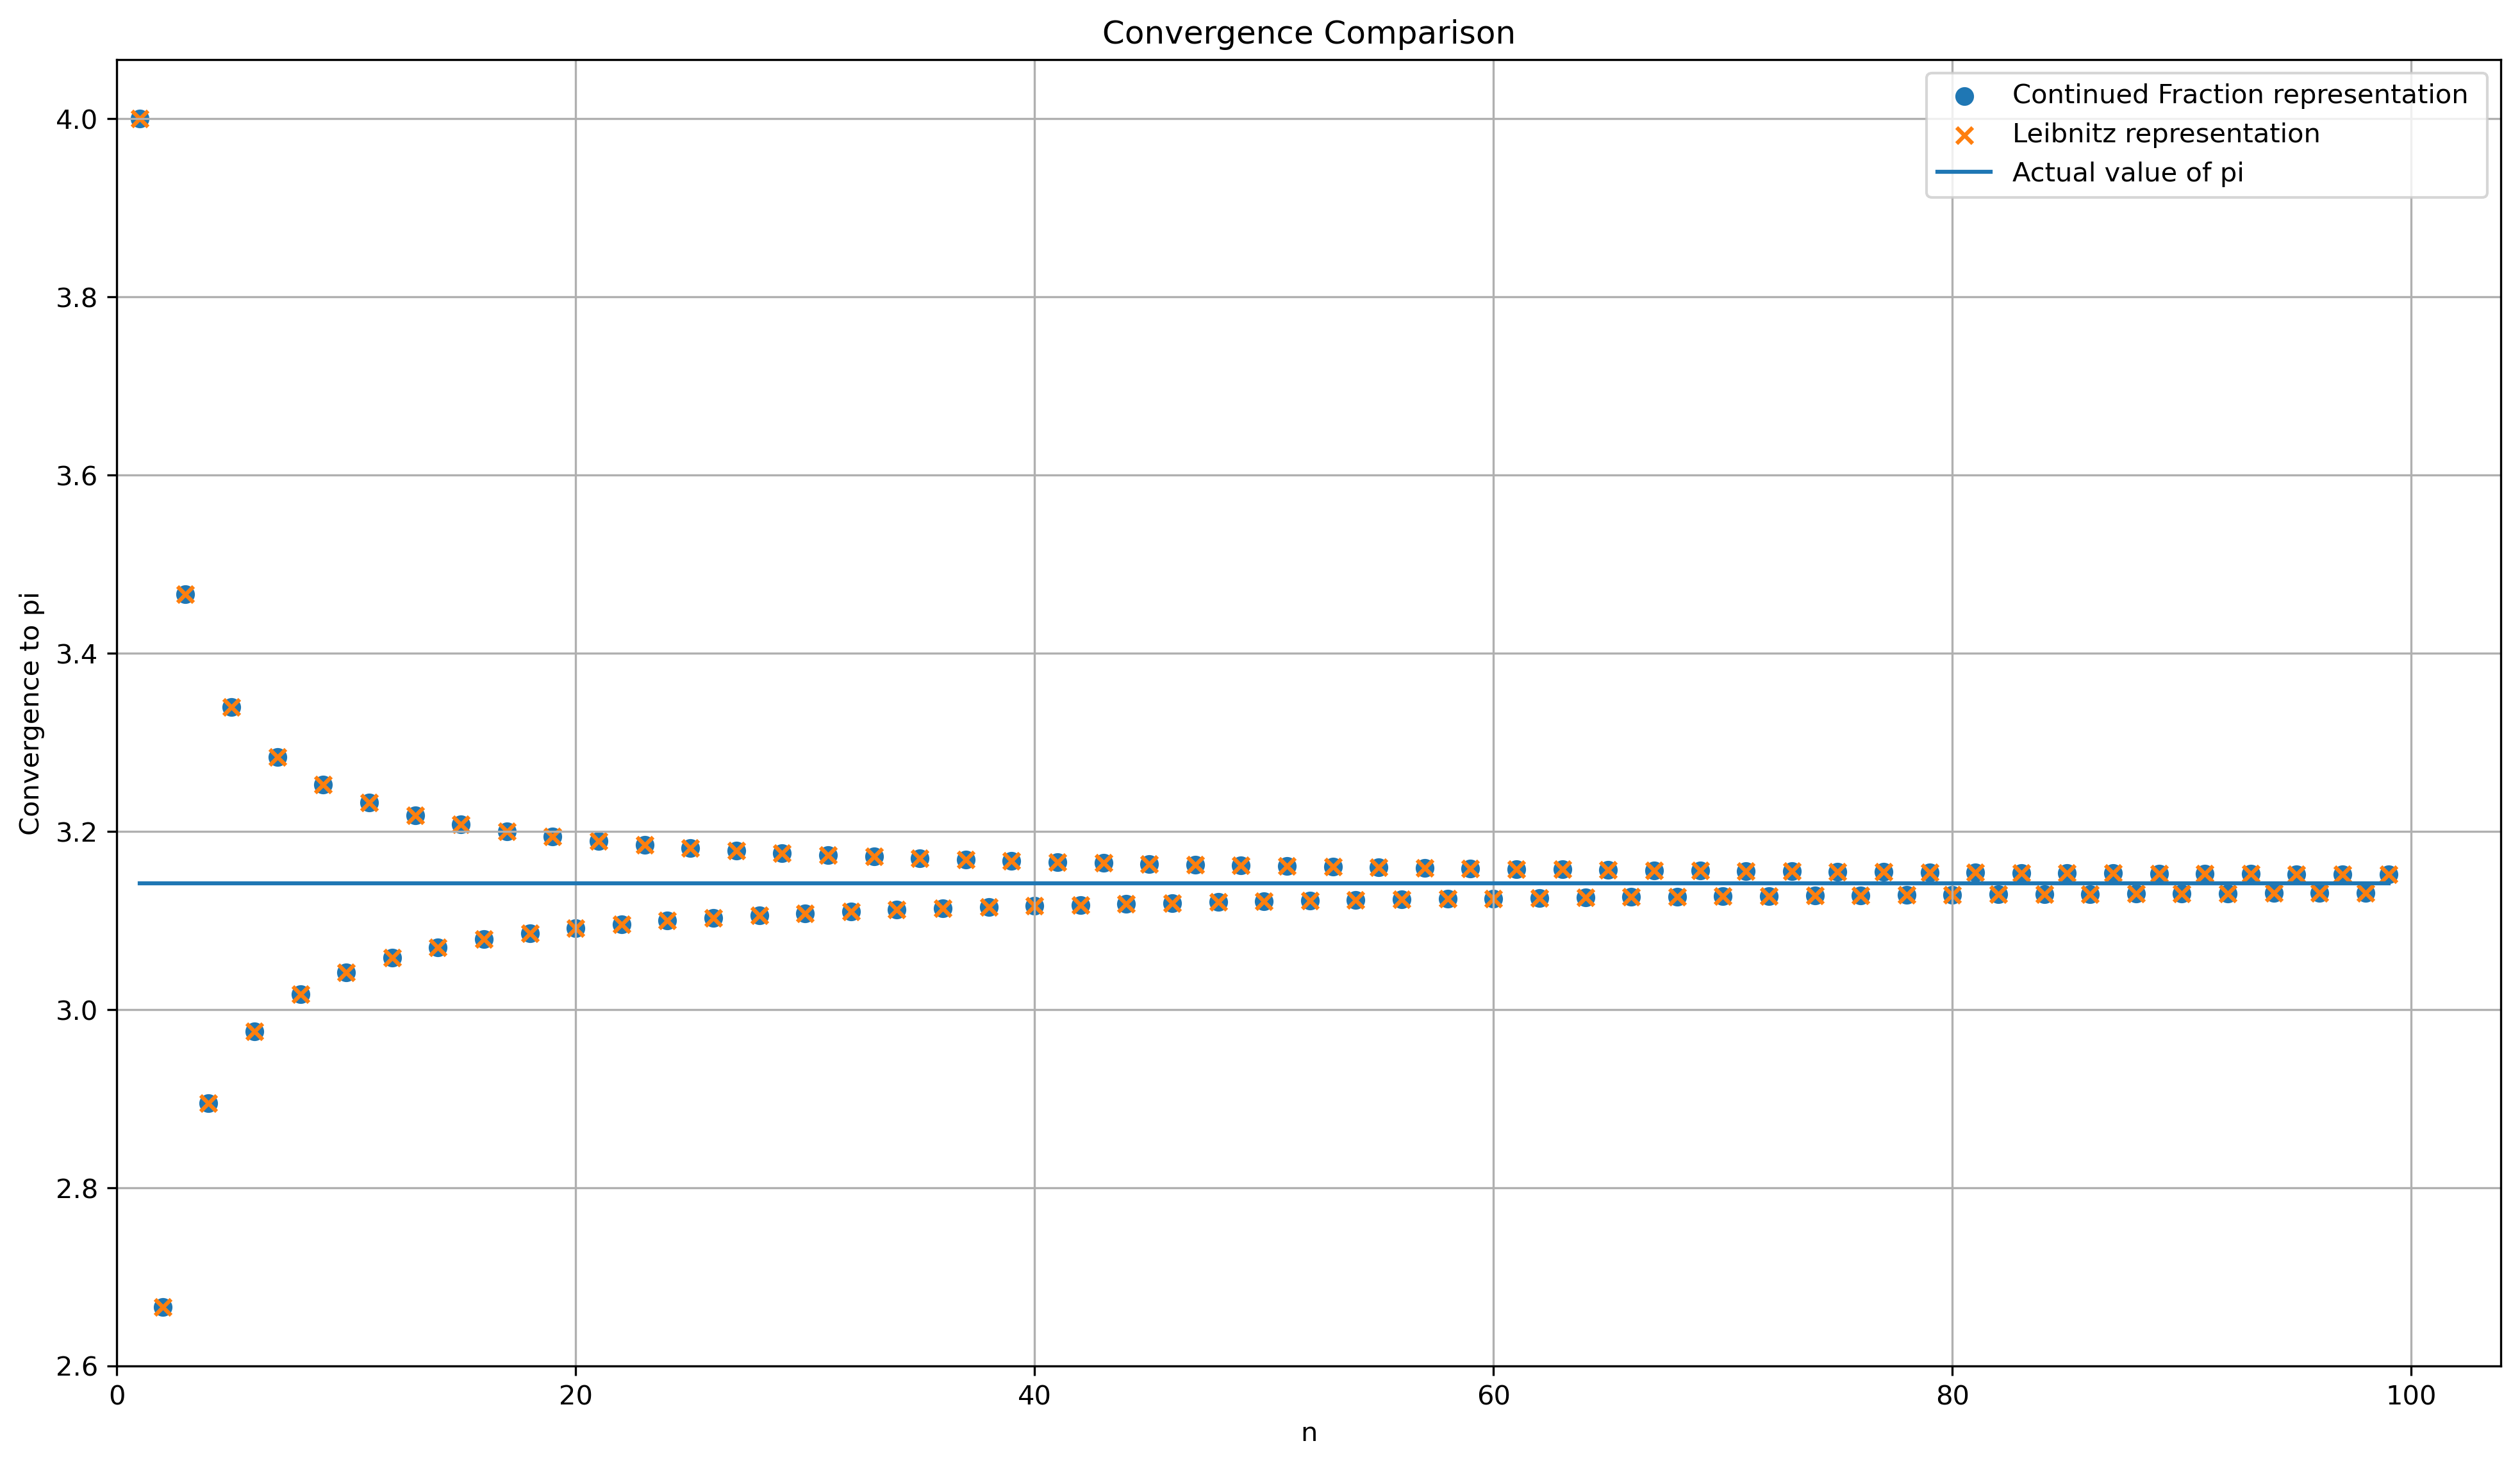

In [21]:
fig2,axes2 = plt.subplots(1,1,figsize=(16,9),dpi=300)
axes2.scatter(nval,picf, label = "Continued Fraction representation ")
axes2.scatter(nval,pile, label = "Leibnitz representation",marker="x")
axes2.plot(nval,piac, label = "Actual value of pi")
axes2.grid()
axes2.legend()
axes2.set_xlim(left=0)
axes2.set_xlabel("n")
axes2.set_ylabel("Convergence to pi")
axes2.set_title("Convergence Comparison");

Both give out the same value for the same n's. The continued fraction and the leibnitz formula give out identical results.